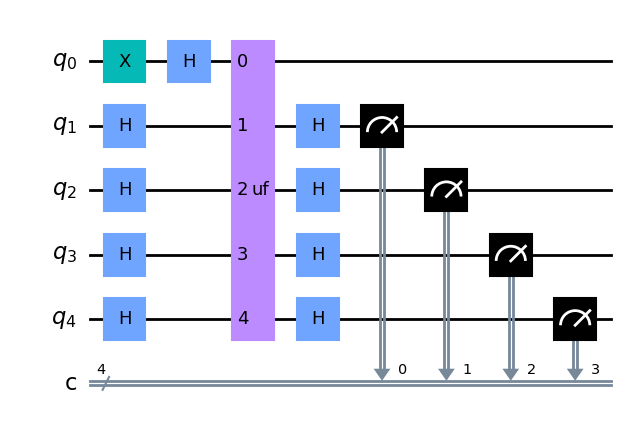

In [11]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uf y, x0, x1, x2, x3 {
cx x3, y;
cx x2, y;
cx x0, y;
}

qreg q[5];
creg c[4];
x q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[0];
uf q[0], q[1], q[2], q[3], q[4];
h q[1];
h q[2];
h q[3];
h q[4];
measure q[1] -> c[0];
measure q[3] -> c[2];
measure q[2] -> c[1];
measure q[4] -> c[3];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

# Draw the circuit
circuit.draw(output='mpl')

In [12]:
# import the simulator backends
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [13]:
backend = Aer.get_backend('qasm_simulator')
# import the qiskit execute
from qiskit import execute

# execuite the circuit on backend, creating a job
job = execute(circuit, backend)

In [14]:
# check the status of the job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [15]:
# get a count of the results
count = job.result().get_counts()
print(count)

{'1101': 1024}
